In [1]:
import math
import copy
import statistics
import numpy as np
import Parsing_midi as pm
import Init_chromo as init
import mido
import matplotlib.pyplot as plt
from mido import Message, MidiFile, MidiTrack
from collections import Counter

In [2]:
midi_list = pm.get_midi('MidiSample/sky.mid', 0)
note_msg, midi_msg = pm.separate_song(midi_list, 15360)
m = midi_msg[1]
n = midi_msg[2]

ori = pm.to_midi_file(m, 8 , 'ori.mid')

516

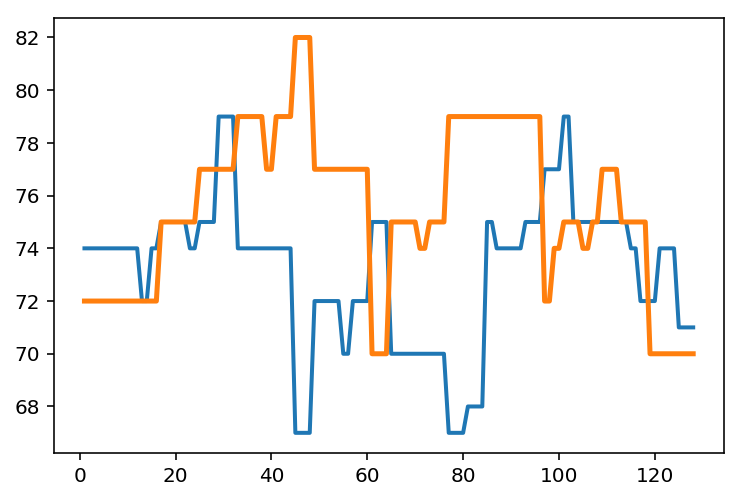

In [4]:
def to_note_freq(midi_msg):
    note_freq = []; count = 0
    for i in range(len(midi_msg)):
        if i % 2 == 0:
            for j in range(int((midi_msg[i].time + midi_msg[i+1].time)/120)):
                count += 1
                note_freq.append([midi_msg[i].note, count])
    return note_freq

def count_area(ori_seq, new_seq):  
    x = [i[1] for i in ori_seq]
    y = [i[0] for i in ori_seq]
    x2 = [i[1] for i in new_seq]
    y2 = [i[0] for i in new_seq]
    area = 0
    for i in range(len(x)):
        area += abs(y[i]-y2[i])
    return area, y, y2 # note seq

note_freq = to_note_freq(m)
note_freq2 = to_note_freq(n)

x = [i[1] for i in note_freq]
y = [i[0] for i in note_freq]

x2 = [i[1] for i in note_freq2]
y2 = [i[0] for i in note_freq2]  

# x3 = [i[1] for i in temp]
# y3 = [i[0] for i in temp] 

plt.plot(x, y, linewidth=2.0)
plt.plot(x2, y2, linewidth=2.5)
# plt.plot(x3, y3, linewidth=2.5)

# before smooth
area, ori_note, new_note = count_area(note_freq, note_freq2)
area

In [5]:
note_freq

[[74, 1],
 [74, 2],
 [74, 3],
 [74, 4],
 [74, 5],
 [74, 6],
 [74, 7],
 [74, 8],
 [74, 9],
 [74, 10],
 [74, 11],
 [74, 12],
 [72, 13],
 [72, 14],
 [74, 15],
 [74, 16],
 [75, 17],
 [75, 18],
 [75, 19],
 [75, 20],
 [75, 21],
 [75, 22],
 [74, 23],
 [74, 24],
 [75, 25],
 [75, 26],
 [75, 27],
 [75, 28],
 [79, 29],
 [79, 30],
 [79, 31],
 [79, 32],
 [74, 33],
 [74, 34],
 [74, 35],
 [74, 36],
 [74, 37],
 [74, 38],
 [74, 39],
 [74, 40],
 [74, 41],
 [74, 42],
 [74, 43],
 [74, 44],
 [67, 45],
 [67, 46],
 [67, 47],
 [67, 48],
 [72, 49],
 [72, 50],
 [72, 51],
 [72, 52],
 [72, 53],
 [72, 54],
 [70, 55],
 [70, 56],
 [72, 57],
 [72, 58],
 [72, 59],
 [72, 60],
 [75, 61],
 [75, 62],
 [75, 63],
 [75, 64],
 [70, 65],
 [70, 66],
 [70, 67],
 [70, 68],
 [70, 69],
 [70, 70],
 [70, 71],
 [70, 72],
 [70, 73],
 [70, 74],
 [70, 75],
 [70, 76],
 [67, 77],
 [67, 78],
 [67, 79],
 [67, 80],
 [68, 81],
 [68, 82],
 [68, 83],
 [68, 84],
 [75, 85],
 [75, 86],
 [74, 87],
 [74, 88],
 [74, 89],
 [74, 90],
 [74, 91],
 [74, 92

In [83]:
def smooth(note_freq, note_seq):  # sliding window = 5
    temp = []
    for i in range(len(note_seq)):
        if i < 2:
            temp.append(note_seq[i])
        elif i > len(note_seq) - 2:
            temp.append(note_seq[i])
        else:
            median = int(statistics.median(note_seq[i-2:i+3]))
            temp.append(median)
    for i in range(len(note_freq)):
        note_freq[i][0] = temp[i]
    return note_freq


temp = smooth(note_freq, new_note)
len(temp)

128

In [69]:
# note_freq

In [63]:
area, ori_note, new_note = count_area(note_freq)

TypeError: 'int' object is not subscriptable

In [34]:
## try 
manual = pm.get_midi('MidiSample/manual.mid', 0)
ori = pm.get_midi('MidiSample/ori.mid', 0)

## temporarily unused
def plot_contour(midi_msg):
    t = 0; note = []         
    for i in range(len(midi_msg)):
        if i% 2 == 0:
            t += (midi_msg[i].time + midi_msg[i+1].time)
            note.append([midi_msg[i].note, t])
    x = [i[1] for i in note]
    y = [i[0] for i in note]
    plt.plot(x, y, linewidth=2.0)
    return x, y, note

In [35]:
# 校正頭尾
def correct_xy(xy1, xy2):
    if xy1[0][1] < xy2[0][1]:
        xy2[0][1] = xy1[0][1]
    else:
        xy1[0][1] = xy2[0][1]

    if xy1[-1][1] < xy2[-1][1]:
        xy2[-1][1] = xy1[-1][1]
    else:
        xy1[-1][1] = xy2[-1][1]
    return xy1, xy2

3420.5


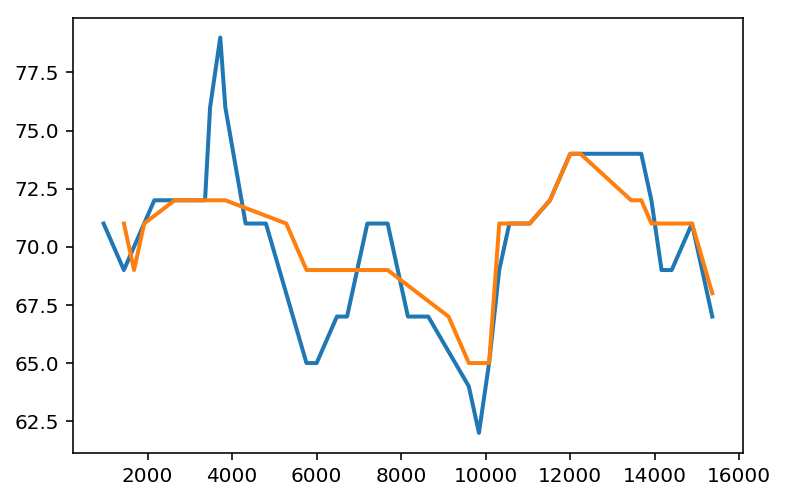

In [8]:
# smooth 後面積差
smooth_ori = smooth(ori, y2)
smooth_try = smooth(manual, y1)

x, y, z = plot_contour(smooth_try)
x1, y1, z1 = plot_contour(smooth_ori)
xy1, xy2 = correct_xy(z, z1)
a1 = area(xy1)
a2 = area(xy2)
print(abs(a1 - a2))

In [36]:
def smooth(original_midi, note_list):  # sliding window = 2
    temp = []
    for i in range(len(note_list)):
        if i < 2:
            temp.append(note_list[i])
        elif i > len(note_list) - 2:
            temp.append(note_list[i])
        else:
            median = statistics.median(note_list[i-1:i+2])
            temp.append(median)
                   
    m = copy.deepcopy(original_midi)
    for i in range(len(temp)):
        if i % 2 == 0:
            m[i*2].note = temp[i]
        else: 
            m[i].note = m[i-1].note            
    return m

TypeError: 'int' object is not callable

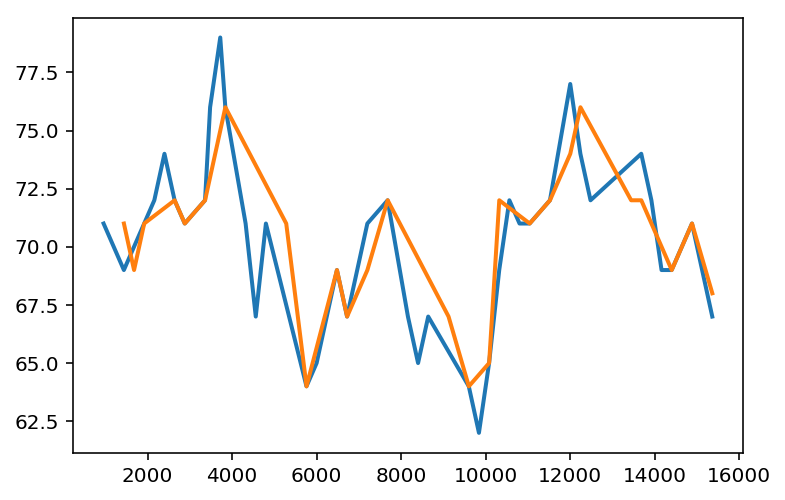

In [38]:
# 尚未smooth前面積差
x1, y1, note1 = plot_contour(manual)
x2, y2, note2 = plot_contour(ori)
xy1, xy2 = correct_xy(note1, note2)
a1 = area(xy1)
a2 = area(xy2)
print(abs(a1 - a2))